In [5]:
import pandas as pd
import numpy as np
import random
def verification_dict(df):
    result_dict = {}

    #check 1: data duplicates
    #counted manually as 'mixed_data_type' column is taken into cosnideration in the tool, while pd.read_excel drops this (so has a higher chance of finding duplicates in this script)
    duplicates = len(df[df.duplicated()])
    result_dict['duplicates'] = duplicates

    #check 2: duplicate columns
    duplicate_col = True if getDuplicateColumns(df) == ['duplicate column'] else False
    result_dict['duplicate_col'] = duplicate_col

    #check 3&4: missing values
    df_missing_definite = df['gender']
    missing_definite = df_missing_definite.isnull().sum()
    result_dict['missing_definite'] = missing_definite

    count_qm = df['education'].value_counts().get('?', 0)
    count_dash = df['education'].value_counts().get('-', 0)
    count_zero = df['education'].value_counts().get(0, 0)
    missing_potential = count_qm + count_dash + count_zero
    result_dict['missing_potential'] = missing_potential

    #check 5: class imbalance
    leq_than_50k = df['income'].value_counts()['<=50K']
    greater_than_50k = df['income'].value_counts()['>50K']
    result_dict['class_imbalance'] = [leq_than_50k/(leq_than_50k + greater_than_50k), greater_than_50k/(leq_than_50k + greater_than_50k)]

    #check 6: conflicting labels
    #COUNT MANUALLY
    result_dict['conflicting_labels'] = 'COUNT MANUALLY'

    #check 8: Single value in column
    single_value_column = True if df['redundant SV column'].nunique() == 1 else False
    result_dict['single_value_column'] = single_value_column

    #check 9: Mixed data types
    numeric_count = df['mixed_data_types'].apply(lambda x: isinstance(x, (int, float))).sum()
    string_count = df['mixed_data_types'].apply(lambda x: isinstance(x, str)).sum()
    result_dict['mixed_dtypes'] = [numeric_count/(numeric_count+string_count), string_count/(numeric_count+string_count)]

    #check 10: Special characters
    ['@#$@', '###', '$$$$$']
    count_1 = (df == '@#$@').sum().sum()
    count_2 = (df == '###').sum().sum()
    count_3 = (df == '$$$$$').sum().sum()
    result_dict['special_characters'] = (count_1 + count_2 + count_3)/len(df)

    #check 11: String mismatch
    variations = ['variation', 'VARIATION', 'Variation@', 'vaRiAtIoN','VARiation!']
    total_variations_count = 0
    for variation in variations:
        count_variation = df['workclass'].value_counts().get(variation, 0)
        total_variations_count += count_variation

    result_dict['string_mismatch'] = total_variations_count

    #check 12: feature-feature correlations
    #feature feature correlation comparison
    from dython.nominal import associations
    df_dython = df.drop(columns='mixed_data_types') #deepchecks does this, so create equal dataframes
    dython_dict= associations(df_dython, nom_nom_assoc='theil', num_num_assoc='spearman')
    dython_dataframe = dython_dict['corr']
    result_dict['feature_feature_correlation'] = {'fnlwgt-age' : dython_dataframe.loc['fnlwgt','age'], 'workclass-age' : dython_dataframe.loc['workclass','age'], 'workclass-education' : dython_dataframe.loc['workclass','education']} #spearman, correlation ratio and Symmetric theil's U respectively

    #check 13: Feature label correlation #PERFORMED ON WHOLE ADULT, see later in notebook


    #check 15:
    Q1 = df['age'].quantile(0.25)
    Q3 = df['age'].quantile(0.75)
    IQR = Q3 - Q1

    outliers_above = (df['age'] >= (Q3 + 1.5 * IQR)).sum()
    result_dict['column_value_outliers'] = [outliers_above]






    return result_dict

In [6]:
def getDuplicateColumns(df):
    #from: https://www.geeksforgeeks.org/how-to-find-drop-duplicate-columns-in-a-pandas-dataframe/
    # Create an empty set
    duplicateColumnNames = set()

    for x in range(df.shape[1]):

        col = df.iloc[:, x]

        for y in range(x + 1, df.shape[1]):

            otherCol = df.iloc[:, y]

            if col.equals(otherCol):
                duplicateColumnNames.add(df.columns.values[y])

    # Return list of unique column names
    # whose contents are duplicates.
    return list(duplicateColumnNames)

C:\Users\robin\AppData\Local\Temp\ipykernel_6100\367589746.py:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_five_rows['income'] = last_five_rows['income'].apply(lambda x: '<=50K' if x=='>50K' else '>50K')
C:\Users\robin\AppData\Local\Temp\ipykernel_6100\367589746.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(last_five_rows, ignore_index=True)


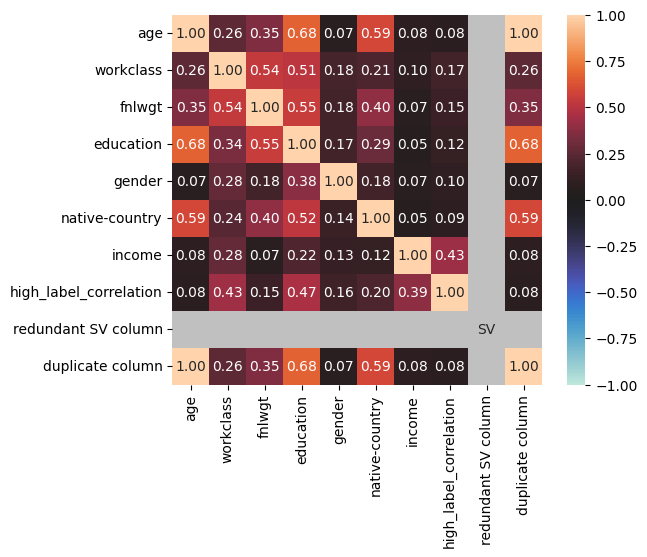

C:\Users\robin\AppData\Local\Temp\ipykernel_6100\367589746.py:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_five_rows['income'] = last_five_rows['income'].apply(lambda x: '<=50K' if x=='>50K' else '>50K')
C:\Users\robin\AppData\Local\Temp\ipykernel_6100\367589746.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(last_five_rows, ignore_index=True)


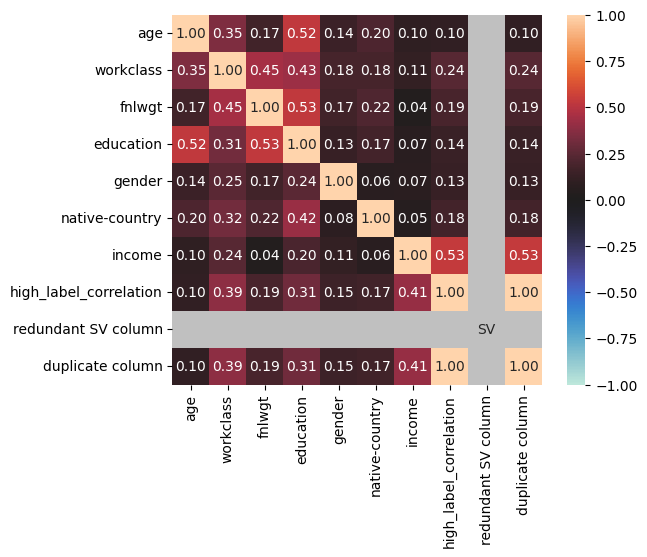

C:\Users\robin\AppData\Local\Temp\ipykernel_6100\367589746.py:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_five_rows['income'] = last_five_rows['income'].apply(lambda x: '<=50K' if x=='>50K' else '>50K')
C:\Users\robin\AppData\Local\Temp\ipykernel_6100\367589746.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(last_five_rows, ignore_index=True)


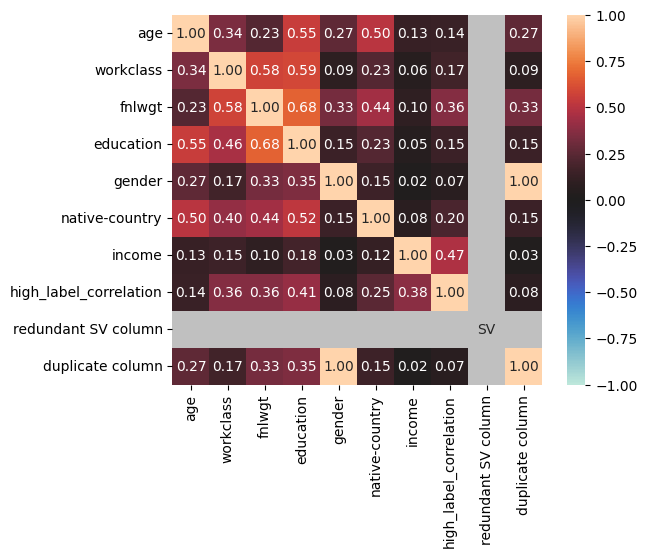

{'duplicates': 6, 'duplicate_col': True, 'missing_definite': 11, 'missing_potential': 13, 'class_imbalance': [0.8, 0.2], 'conflicting_labels': 'COUNT MANUALLY', 'single_value_column': True, 'mixed_dtypes': [0.7272727272727273, 0.2727272727272727], 'special_characters': 0.16363636363636364, 'string_mismatch': 10, 'feature_feature_correlation': {'fnlwgt-age': 0.3537043007040449, 'workclass-age': 0.2565155717785255, 'workclass-education': 0.5094812335036284}, 'column_value_outliers': [8]}
###########################
{'duplicates': 8, 'duplicate_col': True, 'missing_definite': 9, 'missing_potential': 12, 'class_imbalance': [0.6727272727272727, 0.32727272727272727], 'conflicting_labels': 'COUNT MANUALLY', 'single_value_column': True, 'mixed_dtypes': [0.7454545454545455, 0.2545454545454545], 'special_characters': 0.18181818181818182, 'string_mismatch': 12, 'feature_feature_correlation': {'fnlwgt-age': 0.16623640197336428, 'workclass-age': 0.34995573178705597, 'workclass-education': 0.4285989

In [7]:
result_dicts = []
for i in range(1,4):
    dataset = pd.read_csv('datasets/adult.csv')

    df = dataset.sample(n=50, ignore_index=True) # sample 50 random rows
    df.drop(['educational-num', 'marital-status', 'occupation', 'relationship', 'race', 'hours-per-week','capital-gain', 'capital-loss'], axis=1, inplace=True)

    #generate about 20 % definite missingness in gender column (can vary due to later operations)
    amount_missing = int(0.2 * len(df))
    missing_positions = range(df.shape[0])
    for row in random.sample(list(missing_positions), amount_missing):
        df.loc[row, 'gender'] = random.choice([np.nan, None, pd.NaT]) #note that all three will be detected as math.nan, due to how missing values are saved in .xlsx or .csv files
    #generate 20% 'potential' missingness
    for row in random.sample(list(missing_positions), amount_missing):
        df.loc[row, 'education'] = random.choice(['?', '-', 0])

    #change 10% of values in age column to be outliers
    amount_outliers = int(0.1 * len(df))
    outlier_indices = np.random.choice(df.index, amount_outliers, replace=False)
    df.loc[outlier_indices, 'age'] = df.loc[outlier_indices, 'age'] + 100 #make outlier

    #generate random variations of a string in workclass column
    df['workclass'] = df['workclass'].apply(lambda x: x if (random.random() > 0.20 or pd.isnull(x)) else random.choice(['variation', 'VARIATION', 'Variation@', 'vaRiAtIoN','VARiation!']))

    #add 20% special characters to native-country column
    change_indices = df['native-country'].sample(frac=0.2, replace=False).index
    df.loc[change_indices, 'native-country'] = df.loc[change_indices, 'native-country'].apply(
    lambda x: random.choice(['@#$@', '###', '$$$$$']) if pd.notnull(x) else x
    )

    #
    # #add a highly correlated column and place it next to
    # df['highly_correlated_column'] = df['fnlwgt'] + + np.random.normal(0, 1, df.shape[0])
    # # #randomly pick a number between 0 and 5 to determine the amount of values that get randomly changed in the column to not have 100% correlation
    # # amount_of_changes = np.random.randint(0, 6)
    # # random_indices = np.random.choice(df.index, amount_of_changes, replace=False)
    # # #change the values at these indices
    # # for idx in random_indices:
    # #     df.loc[idx, 'highly_correlated_column'] = 0
    # #set the columns besides each other for easy verification
    # cols = df.columns.tolist()
    # idx = cols.index('fnlwgt')
    # cols = cols[:idx+1] + ['highly_correlated_column'] + cols[idx+1:-1]
    # df = df[cols]

    #add column which is highly correalted with the label
    df['high_label_correlation'] = df['income'].map({
        '<=50K': 'average salary',
        '>50K': 'high salary'
    })
    #randomly pick a number between 0 and 5 to determine the amount of values that get randomly changed in the column to not have 100% correlation
    amount_of_changes = np.random.randint(0, 4)
    random_indices = np.random.choice(df.index, amount_of_changes, replace=False)
    #change the values at these indices
    for idx in random_indices:
        df.loc[idx, 'high_label_correlation'] = 'CHANGED VALUE'

    #set the columns besides each other for each verification
    cols = df.columns.tolist()
    idx = cols.index('income')

    cols = cols[:idx+1] + ['high_label_correlation'] + cols[idx+1:-1]
    df = df[cols]


    #generate redundant column
    df['redundant SV column'] = 'this_is_the_same'

    #add a random duplicate column
    random_col = random.choice(df.columns)
    df['duplicate column'] = df[random_col]

    # #add mixed dtypes column
    # data_for_column = np.random.choice([1, 2, 3, 'MD1', 'MD2', 'MD3'], df.shape[0])
    # df['mixed_data_types'] = data_for_column

    df['mixed_data_types'] = np.random.choice([1, 2, 3], df.shape[0])

    #replace 30% with string values
    percentage = int(df.shape[0] * 0.3)
    indexes = np.random.choice(df.index, percentage, replace=False)
    df.loc[indexes, 'mixed_data_types'] = np.random.choice(['MD1', 'MD2', 'MD3'], percentage)

    #replace some rows for duplicates (new duplicate rows can replace sampled rows so always less duplicates than 20% (generates extra randomness)
    to_replace = df.sample(frac=0.2).index
    duplicate_rows_df = df.sample(n=len(to_replace), replace=True)
    duplicate_rows_df.index = to_replace
    df.loc[to_replace] = duplicate_rows_df

    #generate conflicting labels from the last 5 rows of the dataframe
    last_five_rows = df.tail(5)
    #modify the label
    last_five_rows['income'] = last_five_rows['income'].apply(lambda x: '<=50K' if x=='>50K' else '>50K')
    df = df.append(last_five_rows, ignore_index=True)


    df_complete = df.reset_index(drop=True)
    df.to_excel('datasets/synthetic_verification_ds_{}.xlsx'.format(i), index=False)
    df = pd.read_excel('datasets/synthetic_verification_ds_{}.xlsx'.format(i))
    df['mixed_data_types'] = df_complete['mixed_data_types']
    result_dict = verification_dict(df)
    result_dicts.append(result_dict)
print(result_dicts[0])
print('###########################')
print(result_dicts[1])
print('###########################')
print(result_dicts[2])
print('###########################')
#IF ERROR IS RECEIVED JUST RUN AGAIN


In [58]:
#check 13: feature-label correlation PPS
df = pd.read_csv('datasets/adult.csv')
import ppscore as pps
pps_capital_gain = pps.score(df, 'capital-gain', 'income')['ppscore']
pps_workclass = pps.score(df, 'workclass', 'income')['ppscore']
pps_gender= pps.score(df, 'gender', 'income')['ppscore']

print('pps_capital_gain', pps_capital_gain)
print('pps_workclass', pps_workclass)
print('pps_gender', pps_gender)




pps_capital_gain 0.28770025150048495
pps_workclass 0.1064192403672908
pps_gender 1.6858859206791304e-07


In [57]:
#for the verification of dataset 3, we artifically generated 20% special characters in the 'native-country' column, however, due to the natural
#occurence of '?' in the dataset and random sampling, we found 23.64
df = pd.read_excel('datasets/synthetic_verification_ds_3.xlsx')
percentage_question_marks = (df['native-country'].value_counts()['?'] / len(df)) *100
print(percentage_question_marks)

3.6363636363636362


In [53]:
from sklearn.preprocessing import LabelEncoder
df = pd.read_csv('datasets/adult5000.csv')
import math
le = LabelEncoder()
df_categorical = df.select_dtypes(include=['object'])
df[df_categorical.columns] = df_categorical.apply(lambda col: le.fit_transform(col.astype(str)))
from PyNomaly import loop

m = loop.LocalOutlierProbability(df, extent=3, n_neighbors=int(math.sqrt(len(df)))).fit()
scores = m.local_outlier_probabilities

In [54]:
higher_values = [score for score in scores if score > 0.8]
print(len(higher_values))

89


In [33]:
df = pd.read_csv('datasets/adult5000.csv')
le = LabelEncoder()
df_categorical = df.select_dtypes(include=['object'])
df[df_categorical.columns] = df_categorical.apply(lambda col: le.fit_transform(col.astype(str)))
from deepchecks.tabular.checks import OutlierSampleDetection
check = OutlierSampleDetection(nearest_neighbors_percent=round(((math.sqrt(len(df))) / len(df)), 2), extent_parameter=3, n_samples=5000)
result = check.run(df)

deepchecks - WARNING - Received a "pandas.DataFrame" instance. It is recommended to pass a "deepchecks.tabular.Dataset" instance by initializing it with the data and metadata, for example by doing "Dataset(dataframe, label=label, cat_features=cat_features)"
deepchecks - WARNING - It is recommended to initialize Dataset with categorical features by doing "Dataset(df, cat_features=categorical_list)". No categorical features were passed, therefore heuristically inferring categorical features in the data. 9 categorical features were inferred.: workclass, education, educational-num, marital-status, occupation, relationship, race... For full list use dataset.cat_features


In [34]:
res = result.display[1]
print(res)

      Outlier Probability Score  age  workclass  fnlwgt  education  \
1475                   0.997868   49          3  248145         11   
2763                   0.968097   53          3  418901         11   
2263                   0.967151   52          3   45599         11   
4001                   0.965277   31          3  173858         11   
2616                   0.964422   21          3  137510         11   

      educational-num  marital-status  occupation  relationship  race  gender  \
1475                9               2           3             2     4       1   
2763                9               2           3             0     3       1   
2263                9               2           3             0     4       1   
4001                9               2           7             2     1       1   
2616                9               2           3             0     4       1   

      capital-gain  capital-loss  hours-per-week  native-country  income  
1475             

In [45]:
# Convert your DataFrame to a Deepchecks Dataset
import deepchecks.tabular.checks
from deepchecks import Dataset
le = LabelEncoder()
df_categorical = df.select_dtypes(include=['object'])
df[df_categorical.columns] = df_categorical.apply(lambda col: le.fit_transform(col.astype(str)))

dataset = Dataset(df=df)

# Create the check
check = deepchecks.tabular.checks.OutlierSampleDetection(nearest_neighbors_percent=round(((math.sqrt(len(df))) / len(df)), 2), extent_parameter=3, n_samples=5000, n_to_show=5000)

# Run the check
result = check.run(dataset)



C:\Users\robin\AppData\Local\Programs\Python\Python310\lib\site-packages\deepchecks\__init__.py:136: DeprecationWarning:

Ability to import base tabular functionality from the `deepchecks` package directly is deprecated, please import from `deepchecks.tabular` instead

deepchecks - WARNING - It is recommended to initialize Dataset with categorical features by doing "Dataset(df, cat_features=categorical_list)". No categorical features were passed, therefore heuristically inferring categorical features in the data. 9 categorical features were inferred.: workclass, education, educational-num, marital-status, occupation, relationship, race... For full list use dataset.cat_features


In [52]:
#higher_values = [score for score in res.value if score > 0.8]
# print(result.value)
# len(result.value)
#len(result.value)
prob_scores = result.display[1].loc[:,'Outlier Probability Score']
prob_scores_list = list(prob_scores)
higher_values = [score for score in prob_scores_list if score > 0.8]
len(higher_values)

19

In [47]:
len(result.value)
list(result.value)

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0